In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground. 
(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.


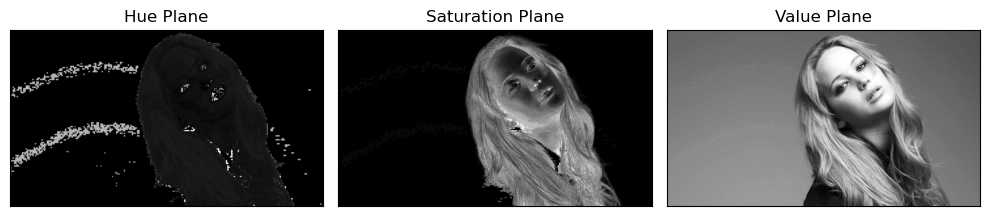

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images\jeniffer.jpg')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv2.split(hsv_image)

# Display the planes in grayscale
plt.figure(figsize=(10, 6))
plt.subplot(131), plt.imshow(hue, cmap='gray')
plt.title("Hue Plane"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(saturation, cmap='gray')
plt.title("Saturation Plane"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(value, cmap='gray')
plt.title("Value Plane"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

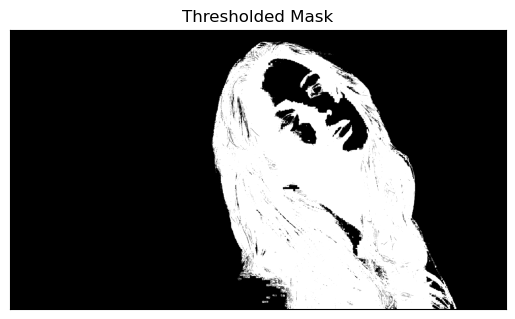

In [2]:
# Use the saturation plane for thresholding
_, thresholded = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded mask
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded Mask")
plt.xticks([]), plt.yticks([])
plt.show()



(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.


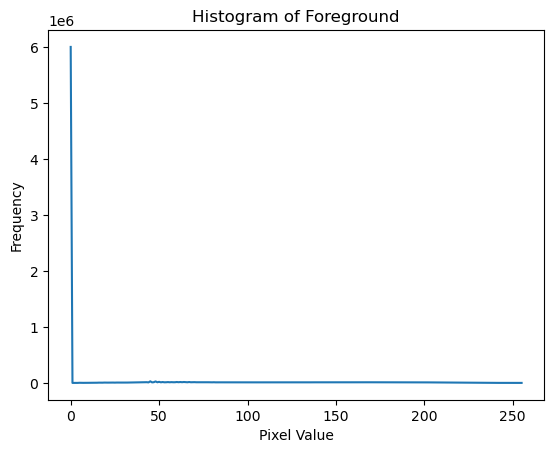

In [3]:
# Extract the foreground using bitwise AND operation
foreground = cv2.bitwise_and(value, value, mask=thresholded)

# Compute the histogram of the foreground
hist_foreground = cv2.calcHist([foreground], [0], None, [256], [0, 256])

# Display the histogram
plt.plot(hist_foreground)
plt.title("Histogram of Foreground")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


(d) Obtain the cumulative sum of the histogram using np.cumsum.


In [4]:
# Compute the cumulative sum of the histogram
cumulative_sum = np.cumsum(hist_foreground)


(e) Use the formulas in slides to histogram-equalize the foreground.


In [5]:
# Normalize the cumulative sum to have values in the range [0, 255]
normalized_cumulative_sum = (cumulative_sum / cumulative_sum[-1]) * 255

# Use the normalized cumulative sum to perform histogram equalization
equalized_foreground = np.interp(foreground, range(256), normalized_cumulative_sum)

# Convert back to uint8
equalized_foreground = equalized_foreground.astype(np.uint8)


(f) Extract the background and add with the histogram equalized foreground.
Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram-equalized foreground

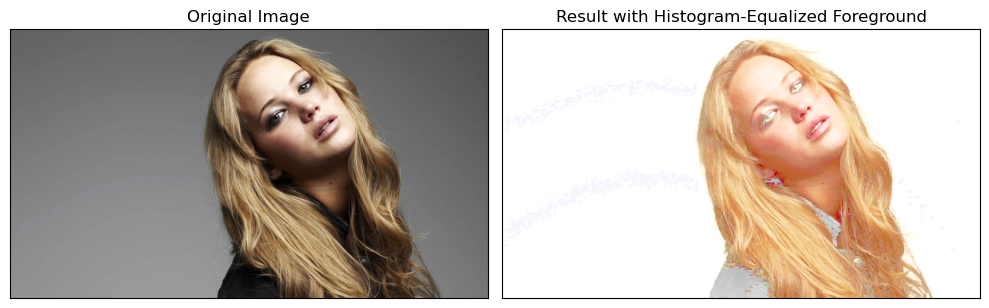

In [6]:
# Invert the thresholded mask to obtain the background
background_mask = cv2.bitwise_not(thresholded)
background = cv2.bitwise_and(value, value, mask=background_mask)

# Combine the equalized foreground and the background
result_value = cv2.add(equalized_foreground, background)

# Merge the modified value plane with the hue and saturation planes
result_hsv = cv2.merge([hue, saturation, result_value])

# Convert the result back to BGR color space
result_bgr = cv2.cvtColor(result_hsv, cv2.COLOR_HSV2BGR)

# Display the original image and the result
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(result_bgr, cv2.COLOR_BGR2RGB))
plt.title("Result with Histogram-Equalized Foreground"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
